# Census Income Prediction

## 1. Analysing The Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Uploading the dataset
df = pd.read_csv('adult.csv') 

In [3]:
df.head() 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#Handling missing values  
edit_col = ['native-country','occupation','workclass']
for col in edit_col:
    df.loc[df[col] == '?', col] = 'Unknown'

In [6]:
#Separating categorical and numerical features 
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [7]:
cat_col

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
income            object
dtype: object

In [8]:
num_col

age                int64
fnlwgt             int64
educational-num    int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [9]:
#Category-wise distribution of numerical parameters
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total = df[col].value_counts()
    percent = (df[col].value_counts() / df.shape[0])*100
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')


--------------------Workclass-------------------------
                  total    percent
Private           33906  69.419762
Self-emp-not-inc   3862   7.907129
Local-gov          3136   6.420703
Unknown            2799   5.730724
State-gov          1981   4.055935
Self-emp-inc       1695   3.470374
Federal-gov        1432   2.931903
Without-pay          21   0.042996
Never-worked         10   0.020474


--------------------Education-------------------------
              total    percent
HS-grad       15784  32.316449
Some-college  10878  22.271815
Bachelors      8025  16.430531
Masters        2657   5.439990
Assoc-voc      2061   4.219729
11th           1812   3.709922
Assoc-acdm     1601   3.277917
10th           1389   2.843864
7th-8th         955   1.955284
Prof-school     834   1.707547
9th             756   1.547848
12th            657   1.345154
Doctorate       594   1.216166
5th-6th         509   1.042136
1st-4th         247   0.505712
Preschool        83   0.169936


---------

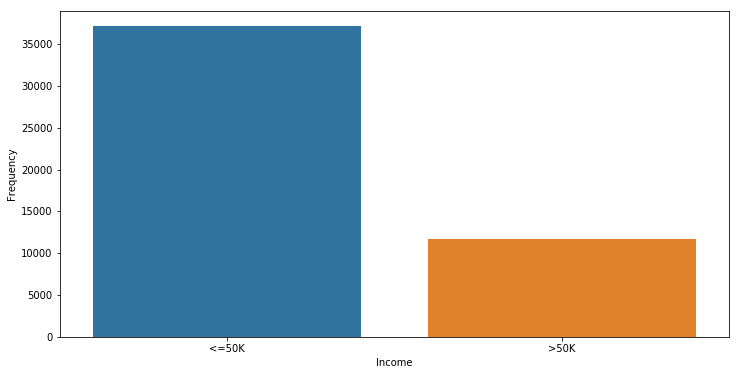

In [10]:
#Bar plot showing frequency of people with annual income less than $50,000 and greater than $50,000
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 10);
plt.ylabel("Frequency",fontsize = 10);

Histograms have been plotted in the following section for all the categories in the dataset, to analyse which tuples or entries might not be appropriate for training our model. Such entries are known as outliers

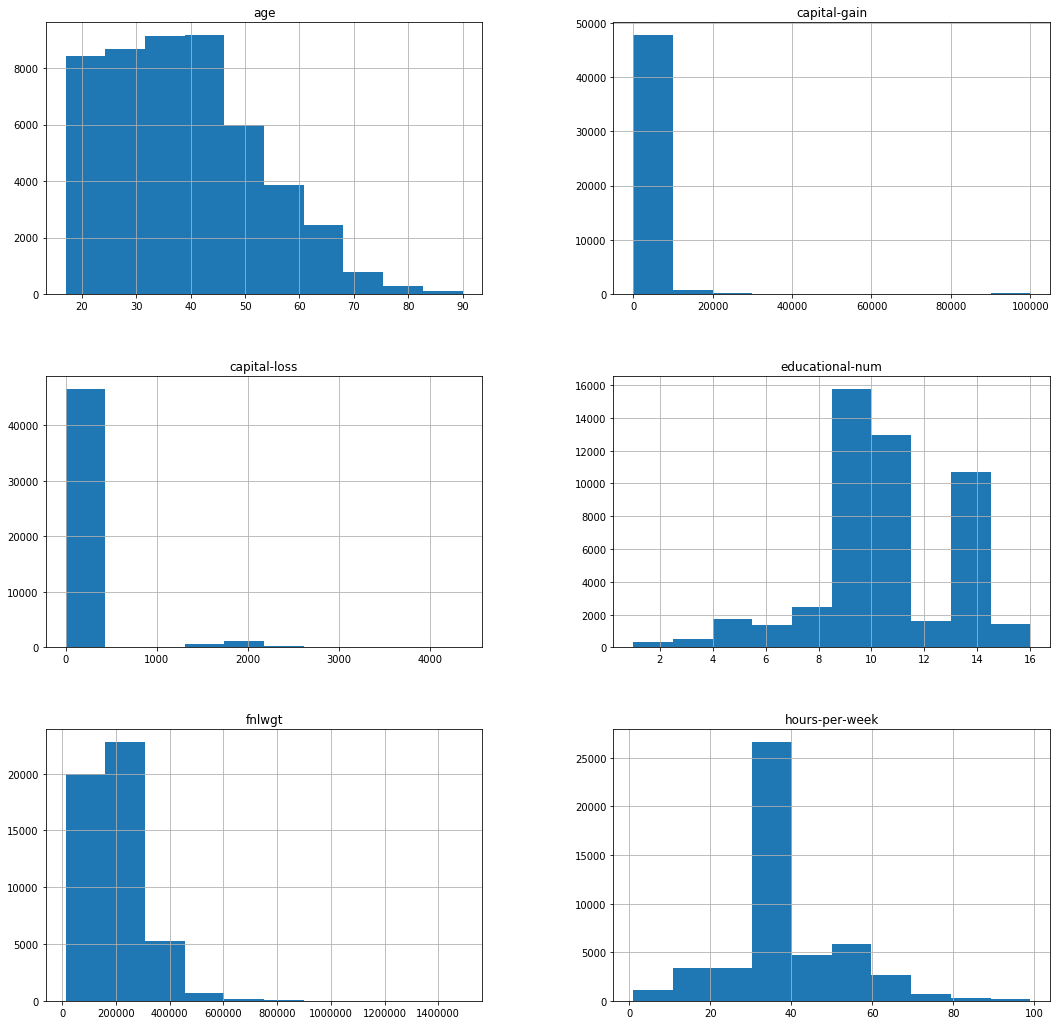

In [11]:
#Histogram for different categorical features
df[list(num_col.index)].hist(figsize = (18,18));

Now, graphical analysis will be done for the proportion of people for different categories based on whether the income is greater or less than $50,000.

In [13]:
ocpt = pd.crosstab(df['occupation'], df['income'])
wc= pd.crosstab(df['workclass'], df['income'])
edu = pd.crosstab(df['education'], df['income'])
marit_stat = pd.crosstab(df['marital-status'], df['income'])
race = pd.crosstab(df['race'], df['income'])
country = pd.crosstab(df['native-country'], df['income'])

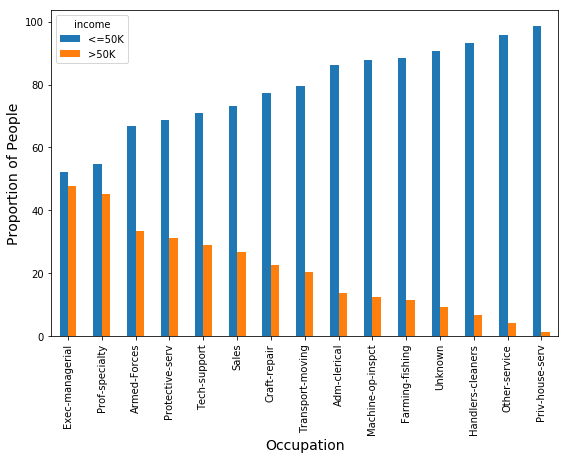

In [14]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(ocpt.div(ocpt.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

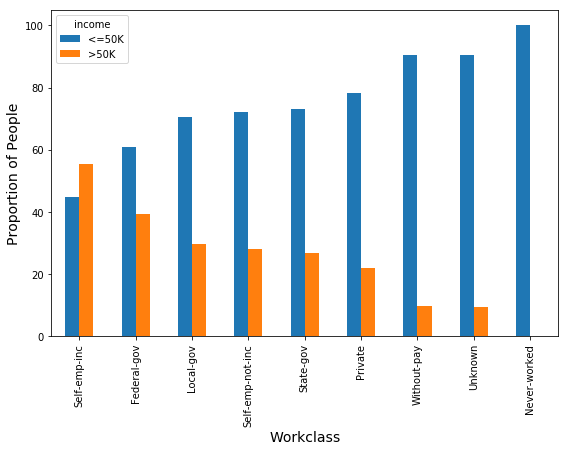

In [15]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,2)
(wc.div(wc.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

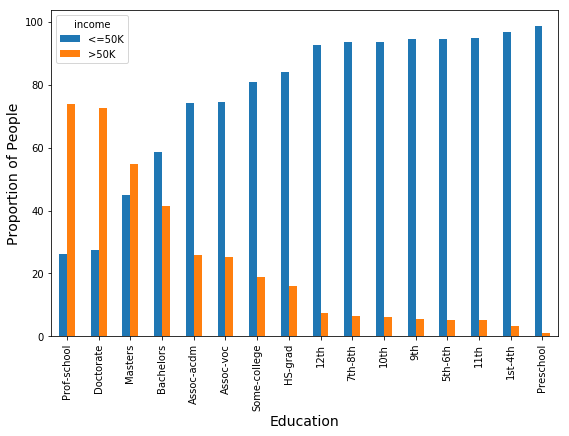

In [16]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(edu.div(edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

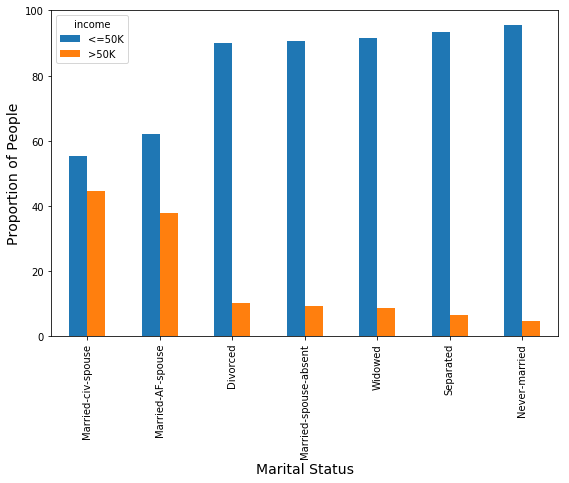

In [17]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,2)
(marit_stat.div(marit_stat.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

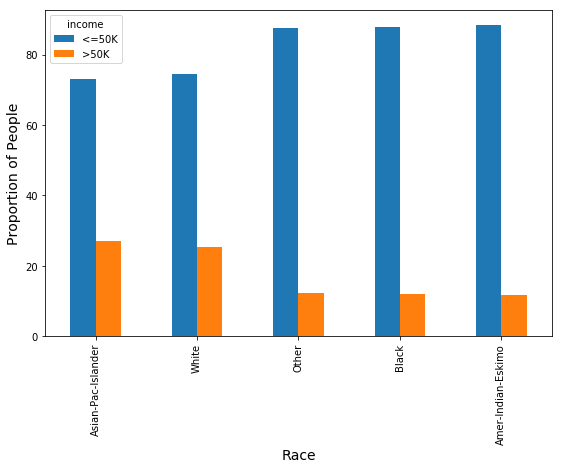

In [18]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,2,1)
(race.div(race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

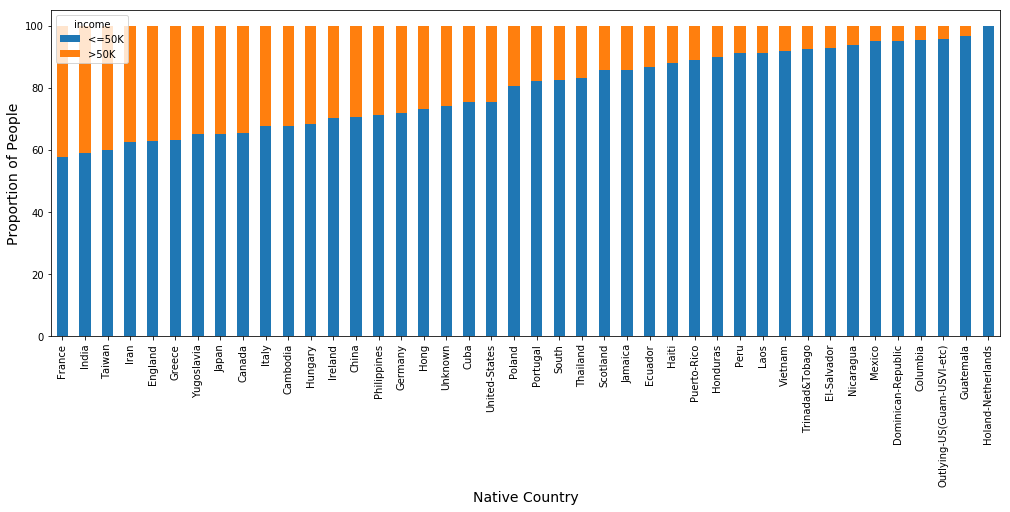

In [19]:
country = pd.crosstab(df['native-country'], df['income'])
(country.div(country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

The seaborn heat map works by correlation. This shows you which variables are correlated to each other from a scale of 1 being the most correlated and -1 is not correlated at all. However, you cannot correlate strings. You can only correlate numerical features.

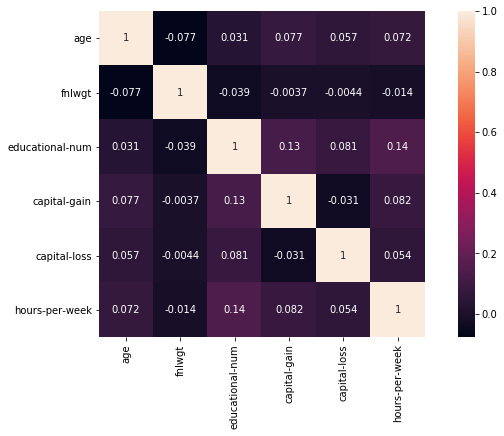

In [20]:
#Plotting heatmaps
fig = plt.figure(figsize = (12,6))
sns.heatmap(df[list(num_col.index)].corr(),annot = True,square = True);

## 2. Data Pre-processing
Since our analysis is done, now we'll be dropping redundant features and inappropriate entries for a perfect dataset.

In [21]:
print(f"Number of observations having capital gain and capital loss zero: {df[(df['capital-loss'] == 0) & (df['capital-gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"-------------------------{col}-------------------------")
    print(df[(df['capital-loss'] == 0) & (df['capital-gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (42525, 15)
-------------------------workclass-------------------------
Private             29851
Self-emp-not-inc     3256
Local-gov            2678
Unknown              2524
State-gov            1738
Self-emp-inc         1254
Federal-gov          1196
Without-pay            18
Never-worked           10
Name: workclass, dtype: int64
-------------------------education-------------------------
HS-grad         14166
Some-college     9739
Bachelors        6560
Masters          2026
Assoc-voc        1781
11th             1680
Assoc-acdm       1398
10th             1295
7th-8th           860
9th               696
12th              619
Prof-school       516
5th-6th           470
Doctorate         409
1st-4th           233
Preschool          77
Name: education, dtype: int64
-------------------------marital-status-------------------------
Married-civ-spouse       18285
Never-married            14952
Divorced                  594

In [22]:
df.loc[df['capital-gain'] > 0,:].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4035.000000,4.035000e+03,4035.000000,4035.000000,4035.0,4035.000000
mean,44.117720,1.870015e+05,11.064188,13061.665675,0.0,43.526146
std,13.370906,1.029421e+05,2.678916,22711.237412,0.0,12.466097
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.168110e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.749950e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.347725e+05,13.000000,13550.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [23]:
df.loc[df['capital-loss'] > 0,:].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,2282.000000,2282.00000,2282.000000,2282.0,2282.000000,2282.000000
mean,41.795355,188025.65206,10.979842,0.0,1872.825592,43.274759
std,12.866690,98913.11462,2.644100,0.0,364.048529,12.032448
min,17.000000,20953.00000,1.000000,0.0,155.000000,1.000000
25%,32.000000,120880.75000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,176862.50000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,233208.75000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.00000,16.000000,0.0,4356.000000,99.000000


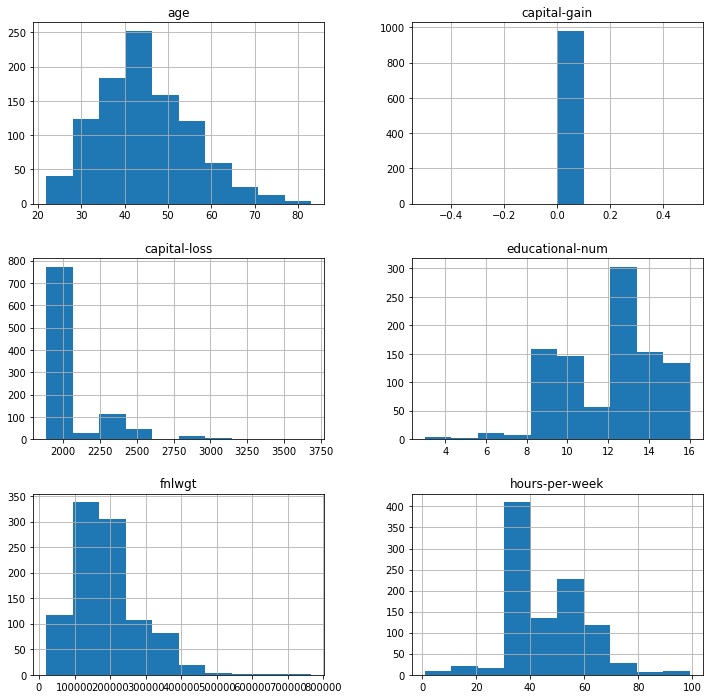

In [24]:
df[(df['capital-loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize = (12,12));

Strip plots are drawn when one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box plot in cases where you want to show all observations along with some representation of the underlying distribution.

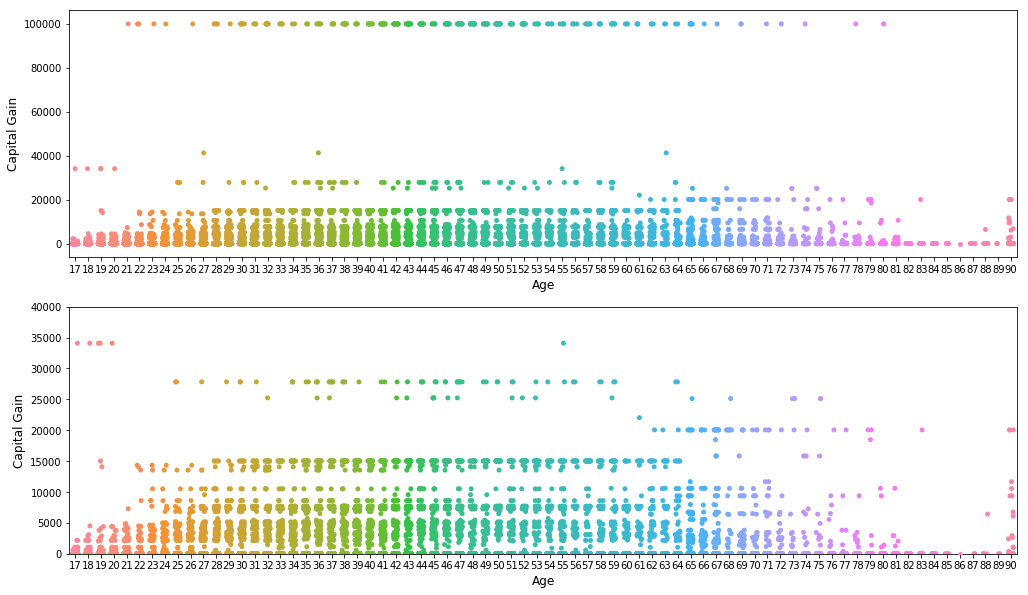

In [25]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = df, jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = df, jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

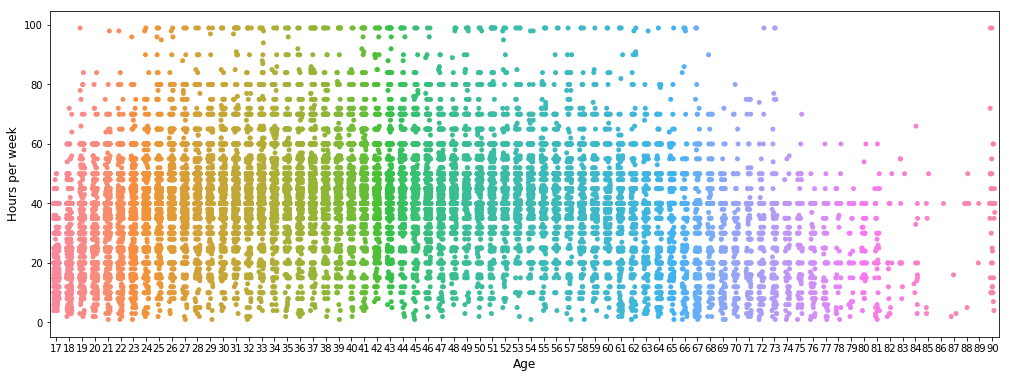

In [26]:
fig = plt.figure(figsize = (17,6))
sns.stripplot('age','hours-per-week', data = df, jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

In [28]:
delete_column = ['relationship','educational-num']
df.drop(labels = delete_column,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns after deleting: 13


In [29]:
entry_age = df[df['age'] == 90].index
df.drop(labels = entry_age,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation after removing: (48787, 13)


In [30]:
entry_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = entry_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation after removing: (48543, 13)


In [31]:
new_num_col = ['age','capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']
new_cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'native-country', 'income']

## 3. Training The Dataset 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sclr = MinMaxScaler()
pd.DataFrame(sclr.fit_transform(df[new_num_col]),columns = new_num_col).head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,capital-gain,capital-loss,hours-per-week,fnlwgt
0,0.111111,0.000000,0.0,0.397959,0.145129
1,0.291667,0.000000,0.0,0.500000,0.052451
2,0.152778,0.000000,0.0,0.397959,0.219649
3,0.375000,0.186105,0.0,0.397959,0.100153
4,0.013889,0.000000,0.0,0.295918,0.061708


In [33]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,att_names):
        self.att_names = att_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.att_names]
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        ndf = pd.DataFrame(X)
        ndf.columns = new_num_col 
        return ndf
        
pipeline = Pipeline([('selector',DataFrameSelector(new_num_col)),('scaler',MinMaxScaler()),('transform',num_trans())])

In [34]:
num_df = pipeline.fit_transform(df)
num_df.shape

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(48543, 5)

In [35]:
cols = ['workclass_Govt_employess','education_Some-college','marital.status_Never-married','occupation_Other-service',
        'race_Black','income_>50K']

In [36]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(new_cat_col)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(df)
cat_df.shape

(48543, 92)

In [37]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (48247, 98)


In [38]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 42)

In [41]:
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [42]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 
               'Extratrees', 'Naive']
models = {clf_logreg:'LogisticRegression', clf_tree:'DecisionTree', clf_knn: 'KNN', clf_svc: 'SVC',
          clf_forest: 'RandomForest', clf_ada: 'Adaboost', clf_bagging: 'Bagging', clf_extratrees:'Extratrees',
          clf_gnb: 'Naive'}

In [43]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 83.5026%
Null Accuracy: 23.7306%
Confusion Matrix
[[1217 1073]
 [ 519 6841]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 83.5026%
Recall Score: 92.9484%
Specificity Score: 53.1441%
False Positive Rate: 46.8559%
Precision Score: 86.4417%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.53      0.60      2290
           1       0.86      0.93      0.90      7360

   micro avg       0.84      0.84      0.84      9650
   macro avg       0.78      0.73      0.75      9650
weighted avg       0.83      0.84      0.83      9650

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTr

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


--------------------------------------------SVC---------------------------------------------------
Accuracy Score for SVC: 83.2435%
Null Accuracy: 23.7306%
Confusion Matrix
[[1116 1174]
 [ 443 6917]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 83.2435%
Recall Score: 93.9810%
Specificity Score: 48.7336%
False Positive Rate: 51.2664%
Precision Score: 85.4901%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.49      0.58      2290
           1       0.85      0.94      0.90      7360

   micro avg       0.83      0.83      0.83      9650
   macro avg       0.79      0.71      0.74      9650
weighted avg       0.82      0.83      0.82      9650



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--------------------------------------------RandomForest---------------------------------------------------
Accuracy Score for RandomForest: 80.5181%
Null Accuracy: 23.7306%
Confusion Matrix
[[1300  990]
 [ 890 6470]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 80.5181%
Recall Score: 87.9076%
Specificity Score: 56.7686%
False Positive Rate: 43.2314%
Precision Score: 86.7292%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      2290
           1       0.87      0.88      0.87      7360

   micro avg       0.81      0.81      0.81      9650
   macro avg       0.73      0.72      0.73      9650
weighted avg       0.80      0.81      0.80      9650

--------------------------------------------Adaboost---------------------------------------------------
Accuracy Score for Adaboost: 83.5751%
Null Ac

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--------------------------------------------Extratrees---------------------------------------------------
Accuracy Score for Extratrees: 79.5959%
Null Accuracy: 23.7306%
Confusion Matrix
[[1306  984]
 [ 985 6375]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 79.5959%
Recall Score: 86.6168%
Specificity Score: 57.0306%
False Positive Rate: 42.9694%
Precision Score: 86.6286%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2290
           1       0.87      0.87      0.87      7360

   micro avg       0.80      0.80      0.80      9650
   macro avg       0.72      0.72      0.72      9650
weighted avg       0.80      0.80      0.80      9650

--------------------------------------------Naive---------------------------------------------------
Accuracy Score for Naive: 45.3472%
Null Accuracy: 23

## 4. Conclusions and Observations

In [44]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                        ascending = False)

,Accuracy Scores
Adaboost,0.835751
LogisticRegression,0.835026
SVC,0.832435
KNN,0.810155
RandomForest,0.805181
Bagging,0.797409
Extratrees,0.795959
DecisionTree,0.759067
Naive,0.453472


In [48]:
new_models = {clf_logreg:'LogisticRegression', clf_forest: 'RandomForest', clf_ada: 'Adaboost', clf_bagging:'Bagging'}
classifiers_new = new_models.values()

In [49]:
#Calculating the time taken by our best four algorithms to train the model 
mean_score = []
for model,value in new_models.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:03.488894
Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:00:07.570512
Time taken to complete training Adaboost model: (hh:mm:ss.ms) 0:00:17.820943
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:00:34.691065


In [50]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
LogisticRegression,0.831385
Adaboost,0.829365
RandomForest,0.802265
Bagging,0.795139
